# Was Air Quality Affected in Countries or Regions Where COVID-19 was Most Prevalent?
**By: Arpit Jain, Maria Stella Vardanega, Tingting Cao, Christopher Chang, Mona Ma, Fusu Luo**

---

## Outline 

#### I. Problem Definition & Data Source Description 

      1. Project Objectives 
      2. Data Source
      3. Dataset Preview

#### II. What are the most prevalent pollutants? 

#### III. What were the pollutant levels in 2019 and 2020 globally, and their averages?

      1. Selecting Data from 2019 and 2020 with air pollutant information
      2. Monthly Air Pollutant Data from 2019 
      3. Monthly Air Pollutant Data from 2020 

#### IV: What cities had the highest changes in pollutant air quality index during COVID-19?

      1. 10 cities with most air quality index reduction for each pollutant 
      2. Cities with more than 50 percent AQI decrease and 50 AQI decrease for each air pollutants

#### V: Regression analysis on COVID-19 cases and pollutant Air Quality Index Globally

#### VI: When were lockdowns implemented for each country?

#### VII: How did Air Quality change in countries with low COVID-19 cases (NZ, AUS, TW) and high COVID-19 cases (US, IT,CN)?
      1. Countries with high COVID cases
      2. Countries with low COVID cases

#### VIII: Conclusion

#### IX: Public Tableau Dashboards

---

## I. Problem Definition & Data Source Description

#### 1. Project Objectives

Air pollution, as one of the most serious environmental problems confronting our civilization, is the presence of toxic gases and particles in the air at levels that pose adverse effects on global climate and lead to public health risk and disease. Exposure to elevated levels of air pollutants has been implicated in a diverse set of medical conditions including cardiovascular and respiratory mortality, lung cancer and autism. 

Air pollutants come from natural sources such as wildfires and volcanoes, as well as are highly related to human activities from mobile sources (such as cars, buses and planes) or stationary sources (such as industrial factories, power plants and wood burning fireplaces). However, in the past year, the COVID-19 pandemic has caused unprecedented changes to the our work, study and daily activities, subsequently led to major reductions in air pollutant emissions. And our team would like take this opportunity to examine the air quality in the past two years and look on how the air quality was impacted in countries and cities where the corona-virus was prevalent.

#### 2. Data Source

**Data Source Description:** In this project, we downloaded worldwide air quality data for Year 2019 and 2020 from the Air Quality Open Data Platform (https://aqicn.org/data-platform/covid19/), which provides historical air quality index and meteorological data for more than 380 major cities across the world. We used air quality index data in 2019 as baseline to find the air quality changes during COVID in 2020. In addition we joined the data with geographic location information from https://aqicn.org/data-platform/covid19/airquality-covid19-cities.json to get air quality index for each pollutant at city-level. According to the data source provider, the data for each major cities is based on the average (median) of several stations. The data set provides min, max, median and standard deviation for each of the air pollutant species in the form of Air Quality Index (AQI) that are converted from raw concentration based on the US Environmental Protection Agency (EPA) standard.

The United States EPA list the following as the criteria at this website (https://www.epa.gov/criteria-air-pollutants/naaqs-table): Carbon Monoxide (CO), Nitrogen Dioxide (NO2), Ozone (O3), Particle Pollution (PM2.5) + (PM10), and finally Sulfur Dioxide (SO2). For the particle pollution the numbers stand for the size of the particles. PM2.5 means particles that are 2.5 micrometers and smaller, while PM10 means particles that are 10 micrometers and smaller. https://www.epa.gov/pm-pollution/particulate-matter-pm-basics. Particle Pollution typically includes Dust, Dirt, and Smoke. Our dataset covers most of the criteria pollutants (PM2.5, PM10, Ozone, SO2, NO2 and CO), and meteorological parameters such as temperature, wind speed, dew point, relative humidity. Air quality index basics are shown in the figure below. 

<img src="https://github.com/ttcao63/775team_project_b2_t2/blob/main/AQI%20basics.PNG?raw=true" align="center"/>

(source: https://www.airnow.gov/aqi/aqi-basics/)

#### 3. Preview of the Dataset

In [2]:
%%bigquery
SELECT * FROM `ba775-team2-b2.AQICN.air_quality_data` LIMIT 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  6.05rows/s]


,Date,Country,City,lat,lon,pop,Parameter,count,min,max,median,variance
0,2020-07-08,NP,Biratnagar,26.45505,87.27007,182324,pm1,16,18.0,198.0,27.0,18671.30
1,2020-02-10,HK,Hong Kong,22.27832,114.17469,7012738,uvi,165,0.1,2.5,0.9,9.49
2,2020-08-24,HK,Hong Kong,22.27832,114.17469,7012738,uvi,195,0.1,10.0,3.7,130.76
3,2020-06-26,NP,Kathmandu,27.70169,85.32060,1442271,pm1,85,8.0,58.0,25.0,1556.39
4,2020-09-28,NP,Kathmandu,27.70169,85.32060,1442271,pm1,90,22.0,96.0,56.0,2270.48
5,2020-02-25,HK,Hong Kong,22.27832,114.17469,7012738,uvi,180,0.1,7.7,1.5,60.24
6,2020-03-15,PR,San Juan,18.46633,-66.10572,418140,aqi,2,22.0,22.0,22.0,0.00
7,2020-06-09,MO,Macau,22.20056,113.54611,520400,uvi,54,-1.0,-1.0,-1.0,0.00
8,2019-11-13,NP,Biratnagar,26.45505,87.27007,182324,pm1,10,45.0,153.0,53.0,18409.30
9,2019-01-10,HK,Hong Kong,22.27832,114.17469,7012738,uvi,140,0.1,4.0,1.0,15.39


---
### II. What are the most prevalent pollutants?

This question focuses on the prevalence of the pollutants. From the dataset, the prevalence can be defined geographically from the cities and countries that had recorded the parameters detected times. 

To find the prevalence, our team selected the parameters from situations in how many distinct cities and countries detected the parameter appeared. 

In [3]:
%%bigquery
SELECT 
Parameter,COUNT(distinct(City)) AS number_of_city,
COUNT(distinct(Country)) AS number_of_country,string_agg(distinct(Country)) AS list_country
FROM `ba775-team2-b2.AQICN.air_quality_data`
GROUP BY Parameter
ORDER BY number_of_city DESC

Downloading: 100%|██████████| 20/20 [00:01<00:00, 13.28rows/s]


,Parameter,number_of_city,number_of_country,list_country
0,humidity,615,95,"PE,EC,CO,AR,HR,HK,BG,PH,JO,IE,BR,ET,LA,NP,PT,G..."
1,temperature,615,95,"JO,UG,PH,HK,NP,MN,GR,RE,AR,BR,GN,DZ,CR,GE,CO,P..."
2,pressure,614,95,"BR,HK,PE,EC,GN,MN,ID,GR,CO,CH,PT,PR,PK,NP,PH,L..."
3,wind-speed,613,95,"SV,PH,AR,SG,ML,MK,RE,LA,BG,EE,JO,CO,CH,SK,BR,I..."
4,wind-gust,586,90,"BR,AE,RE,HR,EE,AR,ID,KG,JO,LK,SG,PT,IS,HK,TJ,S..."
5,dew,582,95,"BH,ET,BG,BR,LK,AE,PK,MN,MK,NP,CO,GE,BD,GN,SG,P..."
6,pm25,548,92,"PT,IS,MM,PR,BR,GE,EE,SG,NP,CO,EC,HR,MO,SV,PE,G..."
7,no2,528,64,"GE,CO,EE,SK,BG,MK,IE,IS,MO,JO,BR,AR,PT,PE,HR,P..."
8,pm10,527,71,"HR,BG,SK,PT,CO,JO,AR,BR,IS,NP,BO,AE,PH,HK,MN,M..."
9,o3,514,63,"SG,PT,MO,CO,EC,BR,IE,BG,BO,MN,GR,PE,MK,PH,MM,E..."


From the result, top 6 parameters are meteorological parameters. And the first air pollutants (which can be harmful to the public health and environment) is PM2.5, followed by NO2 and PM10.

PM2.5 has been detected in 548 cities and  92 countries.  
NO2 has been detected in 528 cities and  64 countries.  
PM10 has been detected in 527 cities and  71 countries.

We conclude PM2.5, NO2 and PM10 are the most prevalent criteria pollutants from the dataset. All of them are considered criteria pollutants set by EPA.

---

### III. What were the pollutant levels in 2019 and 2020 globally, and their averages? 

The purpose of this question is to determine the air pollutant levels in 2019 and 2020. The air pollutant levels in 2019 serve as a baseline for the air pollutant levels in 2020. In the previous question we observe the distinct parameters that are within the Air Quality Database. Since the meteorological parameters are not needed for the project, we can exclude them, and only focus on the air pollutants. 

The first step is create a table where the parameters are only air pollutants and from the years 2019 and 2020. The next step was to select all the rows from each year, that had a certain parameter, and to union them all. This process was done for all six parameters for both years. 

#### 1. Selecting Data from 2019 and 2020 with air pollutant information 

In [43]:
%%bigquery
SELECT Date, Country, City, lat as Latitude, lon as Longitude, pop as Population, Parameter as Pollutant, median as Pollutant_level
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE (extract(year from date) = 2019 OR extract(year from date) = 2020) AND parameter IN ('co', 'o3','no2','so2','pm10',
'pm25')
ORDER BY Country, Date;

Downloading: 100%|██████████| 1968194/1968194 [00:02<00:00, 804214.66rows/s] 


,Date,Country,City,Latitude,Longitude,Population,Pollutant,Pollutant_level
0,2019-01-01,AE,Abu Dhabi,24.45118,54.39696,603492.0,pm25,122.0
1,2019-01-02,AE,Abu Dhabi,24.45118,54.39696,603492.0,pm25,99.0
2,2019-01-03,AE,Abu Dhabi,24.45118,54.39696,603492.0,pm25,117.0
3,2019-01-04,AE,Abu Dhabi,24.45118,54.39696,603492.0,pm25,107.0
4,2019-01-05,AE,Abu Dhabi,24.45118,54.39696,603492.0,pm25,78.0
...,...,...,...,...,...,...,...,...
1968189,2020-12-31,ZA,Durban,-29.85790,31.02920,3120282.0,pm10,20.0
1968190,2020-12-31,ZA,Johannesburg,-26.20227,28.04363,2026469.0,co,3.8
1968191,2020-12-31,ZA,Johannesburg,-26.20227,28.04363,2026469.0,o3,8.1
1968192,2020-12-31,ZA,Johannesburg,-26.20227,28.04363,2026469.0,pm10,16.0


As we can see after filtering the tables for only the air pollutants we have 1.9 million rows. From here we split the data into 2019 data and 2020 data. 

#### 2. Monthly Air Pollutant Data from 2019 

In [41]:
%%bigquery
SELECT extract(month from date) Month, Parameter as Pollutant,Round(avg(median),2) as Avg_Pollutant_Level_2019
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE extract(year from date) = 2019 AND parameter IN ('co')
GROUP BY Month, Parameter

UNION ALL 

SELECT extract(month from date) Month, Parameter ,Round(avg(median),2)
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE extract(year from date) = 2019 AND parameter IN ('o3')
GROUP BY Month, Parameter

UNION ALL 

SELECT extract(month from date) Month, Parameter ,Round(avg(median),2) 
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE extract(year from date) = 2019 AND parameter IN ('no2')
GROUP BY Month, Parameter

UNION ALL 

SELECT extract(month from date) Month, Parameter ,Round(avg(median),2) 
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE extract(year from date) = 2019 AND parameter IN ('so2')
GROUP BY Month, Parameter

UNION ALL 

SELECT extract(month from date) Month, Parameter ,Round(avg(median),2) 
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE extract(year from date) = 2019 AND parameter IN ('pm10')
GROUP BY Month, Parameter

UNION ALL 

SELECT extract(month from date) Month, Parameter ,Round(avg(median),2) 
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE extract(year from date) = 2019 AND parameter IN ('pm25')
GROUP BY Month, Parameter


ORDER BY Month; 

Downloading: 100%|██████████| 72/72 [00:01<00:00, 64.20rows/s] 


,Month,Pollutant,Avg_Pollutant_Level_2019
0,1,pm25,67.53
1,1,co,5.22
2,1,pm10,33.03
3,1,no2,13.74
4,1,o3,15.43
...,...,...,...
67,12,co,5.99
68,12,pm10,31.15
69,12,no2,13.35
70,12,o3,14.29


This query represents the average pollutant level for each air pollutant globally for each month. We do this again for the 2020 data. 

#### 3. Monthly Air Pollutant Data from 2020 

In [42]:
%%bigquery
SELECT extract(month from date) Month, Parameter as Pollutant,Round(avg(median),2) as Avg_Pollutant_Level_2020
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE extract(year from date) = 2020 AND parameter IN ('co')
GROUP BY Month, Parameter

UNION ALL 

SELECT extract(month from date) Month, Parameter ,Round(avg(median),2)
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE extract(year from date) = 2020 AND parameter IN ('o3')
GROUP BY Month, Parameter

UNION ALL 

SELECT extract(month from date) Month, Parameter ,Round(avg(median),2) 
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE extract(year from date) = 2020 AND parameter IN ('no2')
GROUP BY Month, Parameter

UNION ALL 

SELECT extract(month from date) Month, Parameter ,Round(avg(median),2) 
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE extract(year from date) = 2020 AND parameter IN ('so2')
GROUP BY Month, Parameter

UNION ALL 

SELECT extract(month from date) Month, Parameter ,Round(avg(median),2) 
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE extract(year from date) = 2020 AND parameter IN ('pm10')
GROUP BY Month, Parameter

UNION ALL 

SELECT extract(month from date) Month, Parameter ,Round(avg(median),2) 
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE extract(year from date) = 2020 AND parameter IN ('pm25')
GROUP BY Month, Parameter


ORDER BY Month; 

Downloading: 100%|██████████| 72/72 [00:01<00:00, 51.38rows/s]


,Month,Pollutant,Avg_Pollutant_Level_2020
0,1,so2,4.99
1,1,o3,14.90
2,1,no2,12.89
3,1,pm25,68.60
4,1,pm10,31.78
...,...,...,...
67,12,o3,13.10
68,12,no2,12.15
69,12,pm25,65.90
70,12,pm10,31.22


When comparing the data there isn't a noticeable difference in global pollutant levels from 2019 to 2020, which leads to the hypothesis of pollutant levels being regional rather than global. This might also mean that whatever effects might be occurring from COVID-19 cases, and lockdowns are short-term enough that the average monthly air pollutant is not capturing small intricacies in the data. We can further narrow down the data by analyzing data from when lockdowns were occurring in different countries, regions, and even cities. 

---

### IV: What cities had the highest changes in pollutant air quality index during COVID-19? 

In this question, we are trying to find cities with most air quality improvement during COVID, and cities with longest time of certain level AQI reduction.

#### 1. 10 cities with most air quality index reduction for each pollutant
Making queries and creating tables to find monthly average air quality index (AQI) for all pollutants at city level

We are using data in 2019 as a baseline and computing AQI differences and percent differences. Negative difference values indicates air quality index decrease, corresponding to an air quality improvement, and positive difference values indicate air quality index increases, corresponding to an air quality deterioration.

In [1]:
%%bigquery 
CREATE OR REPLACE TABLE AQICN.pollutant_diff_daily_aqi_less_than_500
AS
(
SELECT A.Date AS Date_2020,B.Date AS Date_2019,A.Country,A.City,A.lat,A.lon,A.Parameter,A.pop,A.median AS aqi_2020,B.median AS aqi_2019,(A.median-B.median) AS aqi_diff, ROUND((A.median-B.median)/B.median*100,2) AS aqi_percent_diff
FROM
(SELECT * FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE Parameter in ('pm25','pm10','o3','no2','co','so2') AND EXTRACT(Year FROM Date) = 2020 AND median > 0 AND median < 500) AS A
INNER JOIN
(SELECT * FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE Parameter in ('pm25','pm10','o3','no2','co','so2') AND EXTRACT(Year FROM Date) = 2019 AND median > 0 AND median < 500) AS B
ON A.City = B.City
WHERE EXTRACT(MONTH FROM A.Date) = EXTRACT(MONTH FROM B.Date) AND EXTRACT(DAY FROM A.Date) = EXTRACT(DAY FROM B.Date) AND A.Parameter = B.Parameter
ORDER BY City,Date_2020
)

Query complete after 0.00s: 100%|██████████| 4/4 [00:00<00:00, 2424.10query/s]                        


""


In [2]:
%%bigquery 
CREATE OR REPLACE TABLE AQICN.pollutant_diff_monthly_aqi
AS
SELECT EXTRACT(month FROM Date_2020) AS month_2020,EXTRACT(month FROM Date_2019) AS month_2019,
    Country,City,lat,lon,Parameter,ROUND(AVG(aqi_2020),1) AS monthly_avg_aqi_2020,
    ROUND(AVG(aqi_2019),1) AS monthly_avg_aqi_2019,(ROUND(AVG(aqi_2020),1)-ROUND(AVG(aqi_2019),1)) AS aqi_diff_monthly,
    ROUND((AVG(aqi_2020)-AVG(aqi_2019))/AVG(aqi_2019)*100,2) AS aqi_percent_diff_monthly
FROM AQICN.pollutant_diff_daily_aqi_less_than_500
GROUP BY month_2020,month_2019,Country,City,lat,lon,Parameter


Query complete after 0.00s: 100%|██████████| 4/4 [00:00<00:00, 1818.67query/s]                        


""


In [3]:
%%bigquery
SELECT *
FROM AQICN.pollutant_diff_monthly_aqi
ORDER BY Parameter,month_2020,Country
LIMIT 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  6.39rows/s]


,month_2020,month_2019,Country,City,lat,lon,Parameter,monthly_avg_aqi_2020,monthly_avg_aqi_2019,aqi_diff_monthly,aqi_percent_diff_monthly
0,1,1,AR,Buenos Aires,-34.61315,-58.37723,co,4.2,0.6,3.6,635.48
1,1,1,AT,Linz,48.30639,14.28611,co,0.1,0.1,0.0,0.00
2,1,1,AT,Graz,47.06667,15.45000,co,0.1,0.1,0.0,0.00
3,1,1,AT,Salzburg,47.79941,13.04399,co,0.1,0.1,0.0,0.00
4,1,1,AT,Innsbruck,47.26266,11.39454,co,0.1,0.1,0.0,0.00
5,1,1,AT,Vienna,48.20849,16.37208,co,0.1,0.1,0.0,0.00
6,1,1,AU,Adelaide,-34.92866,138.59863,co,2.0,0.2,1.8,1047.27
7,1,1,AU,Perth,-31.95224,115.86140,co,2.2,2.3,-0.1,-3.92
8,1,1,AU,Sydney,-33.86785,151.20732,co,3.9,2.7,1.2,45.50
9,1,1,AU,Darwin,-12.46113,130.84185,co,3.6,3.8,-0.2,-4.73


Order by monthly average AQI difference to find cities having top 10 air quality index reduction for each pollutant

In [4]:
%%bigquery 

CREATE OR REPLACE TABLE AQICN.top_10_cites_most_pollutant_percent_diff_monthly
AS
(SELECT * 
FROM AQICN.pollutant_diff_monthly_aqi
WHERE Parameter = 'co'
ORDER BY aqi_percent_diff_monthly
LIMIT 10)
UNION ALL
(SELECT * 
FROM AQICN.pollutant_diff_monthly_aqi
WHERE Parameter = 'o3'
ORDER BY aqi_percent_diff_monthly
LIMIT 10)
UNION ALL
(SELECT * 
FROM AQICN.pollutant_diff_monthly_aqi
WHERE Parameter = 'no2'
ORDER BY aqi_percent_diff_monthly
LIMIT 10)
UNION ALL
(SELECT * 
FROM AQICN.pollutant_diff_monthly_aqi
WHERE Parameter = 'pm25'
ORDER BY aqi_percent_diff_monthly
LIMIT 10)
UNION ALL
(SELECT * 
FROM AQICN.pollutant_diff_monthly_aqi
WHERE Parameter = 'pm10'
ORDER BY aqi_percent_diff_monthly
LIMIT 10)

Query complete after 0.00s: 100%|██████████| 3/3 [00:00<00:00, 1727.47query/s]                        


""


In [5]:
%%bigquery 
SELECT *
FROM AQICN.top_10_cites_most_pollutant_percent_diff_monthly
ORDER BY Parameter,aqi_percent_diff_monthly
LIMIT 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  5.25rows/s]


,month_2020,month_2019,Country,City,lat,lon,Parameter,monthly_avg_aqi_2020,monthly_avg_aqi_2019,aqi_diff_monthly,aqi_percent_diff_monthly
0,8,8,US,Portland,45.52345,-122.67621,co,1.8,357.3,-355.5,-99.50
1,7,7,US,Portland,45.52345,-122.67621,co,1.9,148.5,-146.6,-98.73
2,10,10,PL,Poznań,52.40692,16.92993,co,0.1,4.4,-4.3,-97.72
3,12,12,PL,Poznań,52.40692,16.92993,co,0.1,4.1,-4.0,-97.55
4,9,9,PL,Poznań,52.40692,16.92993,co,0.1,3.6,-3.5,-97.24
5,6,6,US,Portland,45.52345,-122.67621,co,1.1,40.6,-39.5,-97.17
6,11,11,PL,Poznań,52.40692,16.92993,co,0.1,2.7,-2.6,-96.28
7,5,5,TR,Samsun,41.27976,36.33610,co,0.4,8.4,-8.0,-95.45
8,12,12,SA,Buraydah,26.32599,43.97497,co,1.0,14.0,-13.0,-92.86
9,9,9,US,Portland,45.52345,-122.67621,co,6.9,85.2,-78.3,-91.95


Order by monthly average percent AQI difference to find cities having top 10 most air quality index reduction for each pollutant

In [6]:
%%bigquery 

CREATE OR REPLACE TABLE AQICN.top_10_cites_most_pollutant_diff_monthly
AS
(SELECT * 
FROM AQICN.pollutant_diff_monthly_aqi
WHERE Parameter = 'pm25'
ORDER BY aqi_diff_monthly
LIMIT 10)
UNION ALL
(SELECT * 
FROM AQICN.pollutant_diff_monthly_aqi
WHERE Parameter = 'o3'
ORDER BY aqi_diff_monthly
LIMIT 10)
UNION ALL
(SELECT * 
FROM AQICN.pollutant_diff_monthly_aqi
WHERE Parameter = 'pm10'
ORDER BY aqi_diff_monthly
LIMIT 10)
UNION ALL
(SELECT * 
FROM AQICN.pollutant_diff_monthly_aqi
WHERE Parameter = 'no2'
ORDER BY aqi_diff_monthly
LIMIT 10)
UNION ALL
(SELECT * 
FROM AQICN.pollutant_diff_monthly_aqi
WHERE Parameter = 'so2'
ORDER BY aqi_diff_monthly
LIMIT 10)
UNION ALL
(SELECT * 
FROM AQICN.pollutant_diff_monthly_aqi
WHERE Parameter = 'co'
ORDER BY aqi_diff_monthly
LIMIT 10)

Query complete after 0.00s: 100%|██████████| 3/3 [00:00<00:00, 1556.52query/s]                        


""


In [7]:
%%bigquery 
SELECT *
FROM AQICN.top_10_cites_most_pollutant_diff_monthly
ORDER BY Parameter,aqi_diff_monthly
LIMIT 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  6.48rows/s]


,month_2020,month_2019,Country,City,lat,lon,Parameter,monthly_avg_aqi_2020,monthly_avg_aqi_2019,aqi_diff_monthly,aqi_percent_diff_monthly
0,8,8,US,Portland,45.52345,-122.67621,co,1.8,357.3,-355.5,-99.50
1,7,7,US,Portland,45.52345,-122.67621,co,1.9,148.5,-146.6,-98.73
2,9,9,US,Portland,45.52345,-122.67621,co,6.9,85.2,-78.3,-91.95
3,5,5,CL,Talca,-35.42640,-71.65542,co,13.2,55.5,-42.3,-76.24
4,6,6,US,Portland,45.52345,-122.67621,co,1.1,40.6,-39.5,-97.17
5,12,12,IR,Yazd,31.89722,54.36750,co,22.1,48.8,-26.7,-54.63
6,10,10,TR,Bursa,40.19559,29.06013,co,22.7,45.6,-22.9,-50.18
7,2,2,TR,Erzurum,39.90861,41.27694,co,6.2,27.7,-21.5,-77.60
8,10,10,MX,Puebla,19.03793,-98.20346,co,10.0,30.9,-20.9,-67.51
9,9,9,IR,Khorramabad,33.48778,48.35583,co,10.3,29.6,-19.3,-65.28


#### 2. Cities with more than 50 percent AQI decrease and 50 AQI decrease for each air pollutants

Reason: the higher the AQI, the unhealthier the air will be, especially for sensitive groups such as people with heart and lung disease, elders and children. A major reduction or percent reduction in AQI for long period of time implies a high air quality impact from the  COIVD pandemic.

In [9]:
%%bigquery

SELECT City,Country,Parameter,COUNT(*) AS num_month_mt_50_per_decrease FROM AQICN.pollutant_diff_monthly_aqi
WHERE aqi_percent_diff_monthly < -50 AND aqi_diff_monthly < -50
GROUP BY City,Country,Parameter
ORDER BY Parameter,COUNT(*) DESC
LIMIT 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  6.79rows/s]


,City,Country,Parameter,num_month_mt_50_per_decrease
0,Portland,US,co,3
1,Qom,IR,no2,5
2,Shiraz,IR,no2,4
3,Khorramabad,IR,no2,3
4,Kayseri,TR,no2,3
5,Sivas,TR,no2,1
6,Butuan,PH,no2,1
7,Aguascalientes,MX,o3,5
8,Brooklyn,US,o3,4
9,The Bronx,US,o3,2


---

Results

During the pandemic, cities getting most air qualities improvements in terms of percent AQI differences for each pollutant are:

CO: United States Portland, Chile Talca and Mexico Aguascalientes;
NO2: Iran Qom, South Africa Middelburg and Philippines Butuan;
SO2: Greece Athens, Mexico Mérida and Mexico San Luis Potosí;
Ozone: Mexico Aguascalientes, United States Queens and United States The Bronx;
PM 10: India Gandhinagar, China Hohhot and Israel Tel Aviv;
PM 2.5: Mexico Mérida, Tajikistan Dushanbe, Bosnia and Herzegovina Sarajevo, Turkey Erzurum, China Qiqihar and India Gandhinagar;


Cities getting at least 50% and 50 AQI reduction with longest time:

CO: United States Portland, 3 out of 12 months;
NO2: Iran Qom, 5 out of 12 months;
O3: Mexico Aguascalientes, 5 out of 12 months;
PM25: several cities including Iran Kermanshah, Singapore Singapore, AU Sydney and Canberra, 1 out of 12 months;
PM10: India Gandhinagar and Bhopal, 2 out of 12 months;
SO2: Mexico Mérida 5 out of 12 months.


---

### V: Regression analysis on COVID-19 cases and pollutant Air Quality Index Globally

The purpose of this part is to find the differences in AQI between 2019 and 2020, also the percentage changes for four parameters which include (NO,NO2,PM2.5 and O3), then join with the COVID confirmed table to find the regression between the AQI and the new confirmed case for each air pollutant.

In [28]:
%%bigquery
select A.month,A.month_n, A.country,A.parameter,round((B.avg_median_month- A.avg_median_month),2) as diff_avg,
(B.avg_median_month - A.avg_median_month)/A.avg_median_month as diff_perc
from 
(SELECT FORMAT_DATETIME("%B", date) month,EXTRACT(year FROM date) year, EXTRACT(month FROM date) month_n, country,parameter,round(avg(median),2) as avg_median_month 
FROM `AQICN.Arpit_Cleaned_Data2`
WHERE Parameter IN ('co','no2','o3','pm25') AND EXTRACT(year FROM date) = 2019
GROUP by 1,2,3,4,5
ORDER BY country, parameter) A
left join 
(SELECT FORMAT_DATETIME("%B", date) month,EXTRACT(year FROM date) year, EXTRACT(month FROM date) month_n, country,parameter,round(avg(median),2) as avg_median_month 
FROM `AQICN.Arpit_Cleaned_Data2`
WHERE Parameter IN ('co','no2','o3','pm25') AND EXTRACT(year FROM date) = 2020
GROUP by 1,2,3,4,5
ORDER BY country, parameter) B
using (month,country,parameter,month_n)
where A.avg_median_month >0

Downloading: 100%|██████████| 2906/2906 [00:01<00:00, 1788.29rows/s]


,month,month_n,country,parameter,diff_avg,diff_perc
0,January,1,AE,pm25,-57.01,-0.522261
1,January,1,AE,o3,-6.49,-0.280346
2,January,1,AE,no2,1.73,0.126647
3,February,2,AE,pm25,-8.46,-0.091598
4,March,3,AE,pm25,-19.36,-0.190965
...,...,...,...,...,...,...
2901,November,11,ZA,co,2.54,0.314356
2902,December,12,ZA,o3,-0.87,-0.098083
2903,December,12,ZA,pm25,-1.50,-0.039630
2904,December,12,ZA,no2,-0.11,-0.027990


In [30]:
%%bigquery
select A.*,confirmed,B.country as country_name
from `all_para_20_19.all_para_20_19_diff` as A
inner join `covid_population.covid _pop` as B
on A.country = B.country_code2 and A.month = B.month and A.month_n = B.month_n
where B.year = 2020
order by A.country,A.month_n

Downloading: 100%|██████████| 2789/2789 [00:01<00:00, 1960.44rows/s]


,month,month_n,country,parameter,diff_avg,diff_perc,confirmed,country_name
0,January,1,AE,o3,-6.49,-0.280346,9.0,United Arab Emirates
1,January,1,AE,no2,1.73,0.126647,9.0,United Arab Emirates
2,January,1,AE,pm25,-57.01,-0.522261,9.0,United Arab Emirates
3,February,2,AE,pm25,-8.46,-0.091598,16.0,United Arab Emirates
4,March,3,AE,o3,3.74,0.255639,789.0,United Arab Emirates
...,...,...,...,...,...,...,...,...
2784,November,11,ZA,pm25,-0.94,-0.024208,65476.0,South Africa
2785,December,12,ZA,co,1.50,0.412088,265262.0,South Africa
2786,December,12,ZA,o3,-0.87,-0.098083,265262.0,South Africa
2787,December,12,ZA,no2,-0.11,-0.027990,265262.0,South Africa


Using Bigquery ML to find liner regression between diff_avg for each parameter and confirmed cases

(Example showing below is that parameter = co; x = confirmed; y=diff_avg --AQI changes)

In [ ]:
%%bigquery
CREATE OR REPLACE MODEL `all_para_20_19.all_para_20_19_diff_covid_model`
# Specify options
OPTIONS
  (model_type='linear_reg',
    input_label_cols=['diff_avg']) AS
# Provide training data
SELECT
confirmed,
diff_avg
FROM
  `all_para_20_19.all_para_20_19_diff_covid`
WHERE
  parameter = 'co'
and diff_avg is not null


Evaluating the model to find out r2_score for each monthly average air pollutant AQI changes vs monthly confirmed new cases linear regression model.
Example showing below is Evaluation for country level monthly average CO AQI vs monthly new confirmed COVID cases model: 

In [23]:
%%bigquery
SELECT * FROM
ML.EVALUATE(
  MODEL `all_para_20_19.all_para_20_19_diff_covid_model`, # Model name
  # Table to evaluate against
  (SELECT
confirmed,
diff_avg
FROM
  `all_para_20_19.all_para_20_19_diff_covid`
WHERE
  parameter = 'co'
and diff_avg is not null
  
  )
)

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.86s/rows]


,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,1.774321,19.836883,0.925992,0.691603,0.004894,0.005452


Evaluation for country level monthly average PM2.5 AQI changes vs monthly new confirmed COVID cases model: 

<img src="https://github.com/ttcao63/775team_project_b2_t2/blob/main/pm25_aqi_confirmed_case.png?raw=true" align="center" width="800"/>

Evaluation for country level monthly average NO2 AQI changes vs monthly new confirmed COVID cases model: 

<img src="https://github.com/ttcao63/775team_project_b2_t2/blob/main/no2_aqi_confirmed_case.png?raw=true" align="center" width="800"/>

Evaluation for country level monthly average O3 AQI changes vs monthly new confirmed COVID cases model: 

<img src="https://github.com/ttcao63/775team_project_b2_t2/blob/main/o3_aqi_confirmed_case.png?raw=true" align="center" width="800"/>

We have also conducted log transformation of x-variables for linear regression, the most correlated data is PM 2.5 AQI changes vs LOG(confirmed case). Visualization is shown below.

<img src="https://github.com/ttcao63/775team_project_b2_t2/blob/main/Viz_PM25_Regression.png?raw=true" align="center" width="800"/>
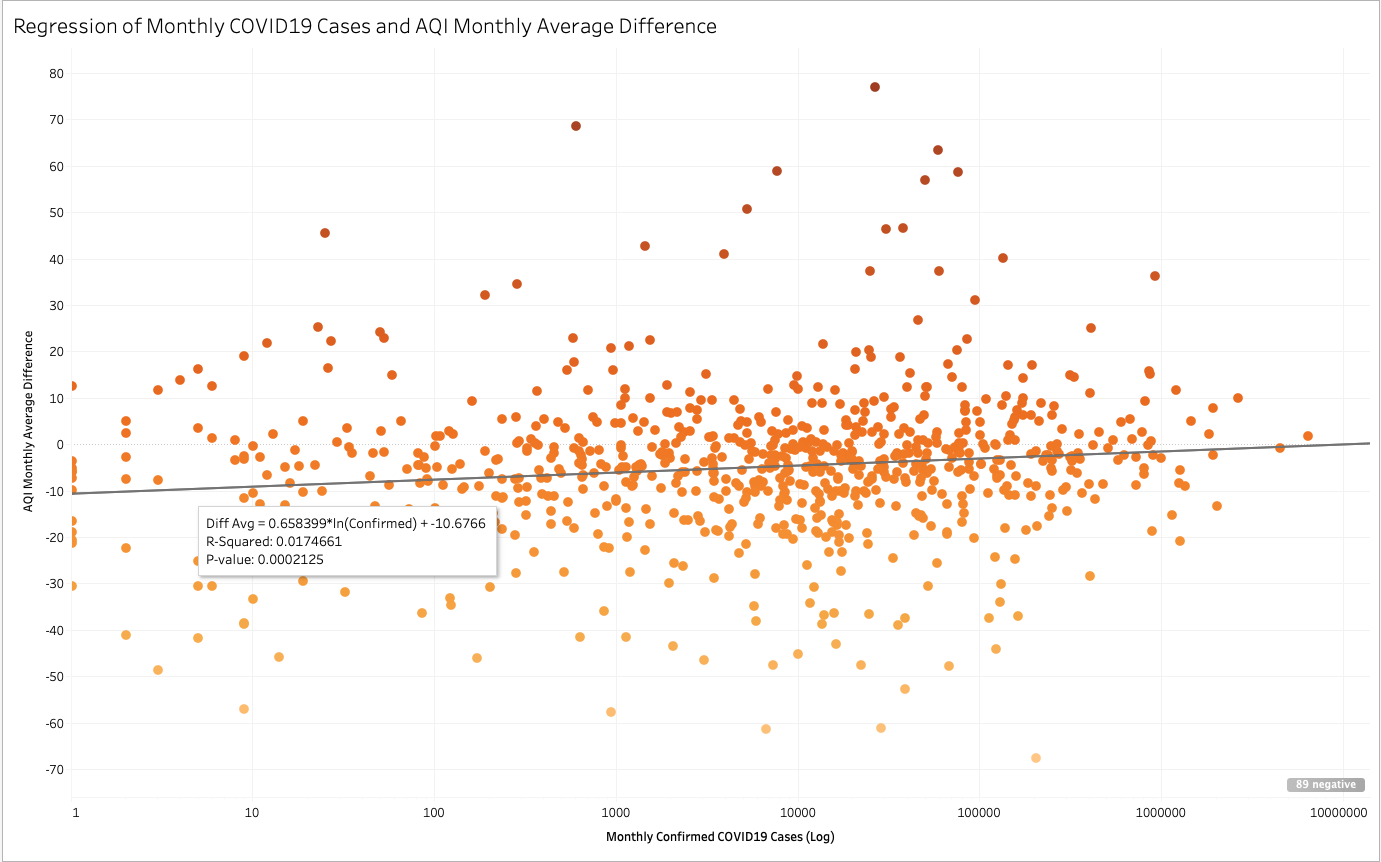

We can see an overall AQI changes from 2019 to 2020. However, after running regression for four air pollutants, model R-squares are less than 0.02, indicating a weak linear relationship between the air quality index changes and the numbers of new confirmed COVID cases. The result makes sense because there are complicated physical and chemical process involved in formation and transportation of air pollution, thus factors such as the weather, energy source, and terrain could also impact the AQI changes. Also, the dramatic increase of new COVID cases might not affect people's response in a way reducing outdoor activities, especially when "stay at home order" is partially lifted.

In this case, we decide to specifically study some countries during their lockdown period and examine the AQI changes.

---

### VI: When were lockdowns implemented for each country? 

Lockdown Dates per Country

China: Jan 23 - April 8, 2020 (Wuhan 76 day lockdown)

USA: March 19 - April 7, 2020 

Italy: March 9 - May 18, 2020

Taiwan: No lockdowns in 2020. Lockdown started in July 2021. 

Australia: March 18 - May/June 2020

New Zealand: March 25 - May/June 2020

From the previous regression model we can see that the there was very little correlation between AQI and confirmed cases, and one of the main reasons is that confirmed cases could not accurately capture human activity. To compensate for this, we narrowed down the dates of our pollutant data in order to compare the pollutant levels only during lockdown periods in 2019 and 2020 for the countries where COVID-19 was most prevalent: China, USA, Italy, and those that COVID-19 wasn't as prevalent: Taiwan, Australia, and New Zealand. We came to a conclusion that most lockdown periods started from mid March to April, May, or June, except for China, which started their lockdown late January until April of 2020. To generalize the lockdown dates for countries other than China, the SQL query included dates from the beginning of March to the end of June. As for China, the query included specific dates from January 23 to April 8th of 2020, which is the Wuhan 76 day lockdown. 

In [21]:
%%bigquery
SELECT country, date, parameter, AVG(count) AS air_quality
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE date BETWEEN '2020-03-01' AND '2020-06-30'
AND country in ('US','IT','AU','NZ','TW')
GROUP BY country, parameter, date
ORDER BY date

Downloading: 100%|██████████| 7741/7741 [00:01<00:00, 4628.58rows/s]


,country,date,parameter,air_quality
0,AU,2020-03-01,neph,114.500000
1,AU,2020-03-01,aqi,97.000000
2,AU,2020-03-01,co,38.500000
3,AU,2020-03-01,o3,81.375000
4,AU,2020-03-01,wd,126.500000
...,...,...,...,...
7736,US,2020-06-30,pressure,104.571429
7737,US,2020-06-30,wind-gust,72.092593
7738,US,2020-06-30,wind-speed,78.946429
7739,US,2020-06-30,temperature,103.553571


In [22]:
%%bigquery
SELECT country, date, parameter, AVG(count) AS air_quality
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE date BETWEEN '2020-01-23' AND '2020-04-08'
AND country = 'CN'
GROUP BY country, parameter, date
ORDER BY date

Downloading: 100%|██████████| 900/900 [00:01<00:00, 558.11rows/s]


,country,date,parameter,air_quality
0,CN,2020-01-23,pol,11.000000
1,CN,2020-01-23,aqi,24.000000
2,CN,2020-01-23,co,230.423077
3,CN,2020-01-23,o3,226.913043
4,CN,2020-01-23,dew,141.039216
...,...,...,...,...
895,CN,2020-04-08,pressure,227.038462
896,CN,2020-04-08,wind-gust,109.272727
897,CN,2020-04-08,wind-speed,201.250000
898,CN,2020-04-08,temperature,227.038462


---

### VII: How did Air Quality change in countries with low COVID-19 cases (NZ, AUS, TW) and high COVID-19 cases (US, IT,CN)?
This question was answered by creating separate tables that encompassed the equivalent lockdown periods per country for 2019. Then, the two tables were joined using the parameter and grouped according to country and parameter to create a subsequent table illustrating the percentage change in average pollution from 2019 to 2020 (during the respective lockdown periods). 

#### 1. Countries with high COVID cases

In [7]:
%%bigquery
CREATE OR REPLACE TABLE AQICN.air_quality2019_Italy AS
    SELECT country, parameter, median AS air_quality2019 FROM `ba775-team2-b2.AQICN.air_quality_data`
    WHERE date BETWEEN '2019-03-09' AND '2019-05-18'
    AND country = 'IT'

Query complete after 0.01s: 100%|██████████| 3/3 [00:00<00:00, 1165.08query/s]                        


""


In [21]:
%%bigquery
SELECT a2020.country, a2020.parameter, AVG(a2020.median) AS air_quality2020, AVG(air_quality2019) AS air_quality2019,
    (AVG(a2020.median)-AVG(air_quality2019))/AVG(air_quality2019) AS percentage_change
FROM `ba775-team2-b2.AQICN.air_quality_data` AS a2020
LEFT JOIN AQICN.air_quality2019_Italy AS a2019
USING(parameter)
WHERE a2020.date BETWEEN '2020-03-09' AND '2020-05-18'
AND a2020.country = 'IT'
AND Parameter in ('pm25','pm10','o3','no2','co','so2')
GROUP BY a2020.country, a2020.parameter
ORDER BY percentage_change

Downloading: 100%|██████████| 6/6 [00:01<00:00,  3.91rows/s]


,country,parameter,air_quality2020,air_quality2019,percentage_change
0,IT,no2,12.644602,19.677324,-0.357402
1,IT,co,0.518944,0.510526,0.016488
2,IT,pm10,19.708010,18.314506,0.076087
3,IT,o3,33.155354,29.901799,0.108808
4,IT,pm25,47.911137,42.977300,0.114801
5,IT,so2,1.778234,1.446649,0.229209


Here we can see that the only pollutant that decreased during the 2020 lockdown in Italy, compared to the respective time period in 2019, was NO2, which decreased by 35.74%.

In [9]:
%%bigquery
CREATE OR REPLACE TABLE AQICN.air_quality2019_US AS
    SELECT country, parameter, median AS air_quality2019 FROM `ba775-team2-b2.AQICN.air_quality_data`
    WHERE date BETWEEN '2019-03-19' AND '2019-04-07'
    AND country = 'US'

Query complete after 0.00s: 100%|██████████| 3/3 [00:00<00:00, 1557.48query/s]                        


""


In [22]:
%%bigquery
SELECT a2020.country, a2020.parameter, AVG(a2020.median) AS air_quality2020, AVG(air_quality2019) AS air_quality2019,
    (AVG(a2020.median)-AVG(air_quality2019))/AVG(air_quality2019) AS percentage_change
FROM `ba775-team2-b2.AQICN.air_quality_data` AS a2020
LEFT JOIN AQICN.air_quality2019_US AS a2019
USING(parameter)
WHERE a2020.date BETWEEN '2020-03-19' AND '2020-04-07'
AND a2020.country = 'US'
AND Parameter in ('pm25','pm10','o3','no2','co','so2')
GROUP BY a2020.country, a2020.parameter
ORDER BY percentage_change

Downloading: 100%|██████████| 6/6 [00:01<00:00,  3.36rows/s]


,country,parameter,air_quality2020,air_quality2019,percentage_change
0,US,o3,22.106296,34.918394,-0.366915
1,US,no2,6.098005,8.739054,-0.302212
2,US,so2,0.837192,1.162690,-0.279953
3,US,pm10,12.529652,15.349693,-0.183720
4,US,co,2.387150,2.632383,-0.093160
5,US,pm25,26.876242,28.994545,-0.073059


In the United States, all the pollutants decreased in 2020 compared to 2019. The largest changes occurred in O3, NO2 and SO2, which decreased by 36.69%, 30.22%, and 27.10% respectively. This indicates that the lockdowns during the COVID-19 pandemic may have positively affected the emission of pollutants in the United States. 

In [11]:
%%bigquery
CREATE OR REPLACE TABLE AQICN.air_quality2019_China AS
    SELECT country, parameter, median AS air_quality2019 FROM `ba775-team2-b2.AQICN.air_quality_data`
    WHERE date BETWEEN '2019-01-23' AND '2019-04-08'
    AND country = 'CN'

Query complete after 0.00s: 100%|██████████| 3/3 [00:00<00:00, 1746.17query/s]                        


""


In [23]:
%%bigquery
SELECT a2020.country, a2020.parameter, AVG(a2020.median) AS air_quality2020, AVG(air_quality2019) AS air_quality2019,
    (AVG(a2020.median)-AVG(air_quality2019))/AVG(air_quality2019) AS percentage_change
FROM `ba775-team2-b2.AQICN.air_quality_data` AS a2020
LEFT JOIN AQICN.air_quality2019_China AS a2019
USING(parameter)
WHERE a2020.date BETWEEN '2020-01-23' AND '2020-04-08'
AND a2020.country = 'CN'
AND Parameter in ('pm25','pm10','o3','no2','co','so2')
GROUP BY a2020.country, a2020.parameter
ORDER BY percentage_change

Downloading: 100%|██████████| 6/6 [00:01<00:00,  4.01rows/s]


,country,parameter,air_quality2020,air_quality2019,percentage_change
0,CN,no2,10.738755,15.535772,-0.308772
1,CN,pm10,47.729418,59.286582,-0.194937
2,CN,so2,4.703238,5.817949,-0.191599
3,CN,co,6.528790,7.537038,-0.133772
4,CN,pm25,97.900100,112.806582,-0.132142
5,CN,o3,25.110255,22.837017,0.099542


In China, most pollutants decreased in 2020 compared to the same period in 2019. The largest change was in NO2 which decreased by 30.88% compared to the previous year.

#### 2. Countries with low COVID cases

In [13]:
%%bigquery
CREATE OR REPLACE TABLE AQICN.air_quality2019_Taiwan AS
    SELECT country, parameter, median AS air_quality2019 FROM `ba775-team2-b2.AQICN.air_quality_data`
    WHERE EXTRACT(month FROM date) = 07
    AND EXTRACT(year FROM date) = 2019
    AND country = 'TW'

Query complete after 0.00s: 100%|██████████| 3/3 [00:00<00:00, 1918.71query/s]                        


""


In [24]:
%%bigquery
SELECT a2020.country, a2020.parameter, AVG(a2020.median) AS air_quality2020, AVG(air_quality2019) AS air_quality2019,
    (AVG(a2020.median)-AVG(air_quality2019))/AVG(air_quality2019) AS percentage_change
FROM `ba775-team2-b2.AQICN.air_quality_data` AS a2020
LEFT JOIN AQICN.air_quality2019_Taiwan AS a2019
USING(parameter)
WHERE EXTRACT(month FROM a2020.date) = 07
AND EXTRACT(year FROM a2020.date) = 2020
AND a2020.country = 'TW'
AND Parameter in ('pm25','pm10','o3','no2','co','so2')
GROUP BY a2020.country, a2020.parameter
ORDER BY percentage_change

Downloading: 100%|██████████| 6/6 [00:01<00:00,  4.02rows/s]


,country,parameter,air_quality2020,air_quality2019,percentage_change
0,TW,pm25,29.458781,41.387097,-0.288213
1,TW,pm10,16.777778,20.183453,-0.168736
2,TW,so2,2.647670,3.126165,-0.153061
3,TW,o3,13.734767,15.151254,-0.093490
4,TW,no2,6.240143,6.476703,-0.036525
5,TW,co,2.445878,2.480935,-0.014131


Taiwan, which did not experience lockdowns due to COVID-19, also shows a decrease in all pollutant levels. This contradicts our initially hypothesis that countries who experienced more COVID-19 and therefore more lockdowns would have better air quality. 

In [18]:
%%bigquery
CREATE OR REPLACE TABLE AQICN.air_quality2019_AUS AS
    SELECT country, parameter, median AS air_quality2019 FROM `ba775-team2-b2.AQICN.air_quality_data`
    WHERE date BETWEEN '2019-03-25' AND '2019-05-31'
    AND country = 'NZ'

Query complete after 0.00s: 100%|██████████| 3/3 [00:00<00:00, 1679.29query/s]                        


""


In [25]:
%%bigquery
SELECT a2020.country, a2020.parameter, AVG(a2020.median) AS air_quality2020, AVG(air_quality2019) AS air_quality2019,
    (AVG(a2020.median)-AVG(air_quality2019))/AVG(air_quality2019) AS percentage_change
FROM `ba775-team2-b2.AQICN.air_quality_data` AS a2020
LEFT JOIN AQICN.air_quality2019_NZ AS a2019
USING(parameter)
WHERE a2020.date BETWEEN '2020-03-25' AND '2020-05-31'
AND Parameter in ('pm25','pm10','o3','no2','co','so2')
AND a2020.country = 'NZ'
GROUP BY a2020.country, a2020.parameter
ORDER BY percentage_change

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.27rows/s]


,country,parameter,air_quality2020,air_quality2019,percentage_change
0,NZ,so2,0.797778,28.130769,-0.971640
1,NZ,no2,2.657353,76.432836,-0.965233
2,NZ,co,3.272059,63.716418,-0.948647
3,NZ,pm10,11.835784,79.049261,-0.850273
4,NZ,pm25,26.519608,53.019900,-0.499818


New Zealand also shows a decrease in all pollutant levels. Nevertheless, New Zealand did go into lockdown for a period and these numbers may reflect the lessened activity due to COVID-19 during that time compared to the equivalent in 2019. 

In [20]:
%%bigquery
CREATE OR REPLACE TABLE AQICN.air_quality2019_AUS AS
    SELECT country, parameter, median AS air_quality2019 FROM `ba775-team2-b2.AQICN.air_quality_data`
    WHERE date BETWEEN '2019-03-18' AND '2019-05-31'
    AND country = 'AU'

Query complete after 0.00s: 100%|██████████| 3/3 [00:00<00:00, 1443.66query/s]                        


""


In [26]:
%%bigquery
SELECT a2020.country, a2020.parameter, AVG(a2020.median) AS air_quality2020, AVG(air_quality2019) AS air_quality2019,
    (AVG(a2020.median)-AVG(air_quality2019))/AVG(air_quality2019) AS percentage_change
FROM `ba775-team2-b2.AQICN.air_quality_data` AS a2020
LEFT JOIN AQICN.air_quality2019_AUS AS a2019
USING(parameter)
WHERE a2020.date BETWEEN '2020-03-18' AND '2020-05-31'
AND Parameter in ('pm25','pm10','o3','no2','co','so2')
AND a2020.country = 'AU'
GROUP BY a2020.country, a2020.parameter
ORDER BY percentage_change

Downloading: 100%|██████████| 6/6 [00:01<00:00,  4.52rows/s]


,country,parameter,air_quality2020,air_quality2019,percentage_change
0,AU,pm25,21.228606,23.831293,-0.109213
1,AU,so2,1.392407,1.554440,-0.104239
2,AU,pm10,12.569682,13.455782,-0.065853
3,AU,no2,4.620783,4.650598,-0.006411
4,AU,co,2.278157,2.132509,0.068299
5,AU,o3,10.257311,7.095214,0.445666


Australia shows decreases in most pollutant parameter levels in 2020 compared to respective periods in 2019. 

The fact that all tables illustrate decrease in most pollutant parameter levels, except for Italy, seems to contradict our initial hypothesis. Initially, we hypothesized that in countries where COVID-19 was more prevalent, and therefore where there were more lockdowns and less human activity, there would be better pollutant levels. However, when looking at the results of the analysis, one can see that the extent to which COVID-19 was prevalent does not seem to largely affect the pollutant parameter levels considering that regardless of the country they seem to have decreased in 2020 compared to 2019. This may be due to various governmental and public policies regarding climate change that have pushed countries to improve the air quality as well as the general decrease in human activity worldwide due to the pandemic.

---

### VIII: Conclusion

In this project, we used air quality index (AQI) dataset among 380 major cities across the world from 2019 to 2020 to study criteria air pollutant level changes during the COVID pandemic. According to the result, we conclude that the COVID impacts air quality more at regional-level than at global-level, more in a relative short period of time than in a relative long-term. Even though we don't see a strong relationship between air quality changes versus numbers of confirmed COIVD case, we find that lockdowns during the pandemic do make effects on air pollutant levels in different countries due to reduced outdoor human activities.

---

### IX: Public Tableau Dashboards

To interact with our public Tableau dashboards please visit: https://public.tableau.com/app/profile/arpit.jain7335/viz/AnalyzingAirQualityDuringCOVID19Pandemic/AirQualityGlobalLevel?publish=yes

<img src="https://github.com/arp-jain/BA775-team2-b2/blob/main/Air%20Quality%20Global%20Level.png?raw=true" align="center"/>

<img src="https://github.com/arp-jain/BA775-team2-b2/blob/main/Air%20Quality%20City%20Level.png?raw=true" align="center"/>